In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("Advertising.csv")

In [4]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
X = df.drop('sales', axis=1)
y = df['sales']

In [6]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_converter = PolynomialFeatures(degree=2, include_bias=False)

In [7]:
polynomial_converter.fit(X)

PolynomialFeatures(include_bias=False)

In [9]:
poly_features = polynomial_converter.transform(X)
poly_features.shape

(200, 9)

In [10]:
poly_features[0]
# A**2, B**2, C**2, AB, AC, BC, A, B, C => (200, 9)

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [11]:
polynomial_converter.fit_transform(X)

array([[ 230.1 ,   37.8 ,   69.2 , ..., 1428.84, 2615.76, 4788.64],
       [  44.5 ,   39.3 ,   45.1 , ..., 1544.49, 1772.43, 2034.01],
       [  17.2 ,   45.9 ,   69.3 , ..., 2106.81, 3180.87, 4802.49],
       ...,
       [ 177.  ,    9.3 ,    6.4 , ...,   86.49,   59.52,   40.96],
       [ 283.6 ,   42.  ,   66.2 , ..., 1764.  , 2780.4 , 4382.44],
       [ 232.1 ,    8.6 ,    8.7 , ...,   73.96,   74.82,   75.69]])

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

In [13]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [15]:
test_prediction = model.predict(X_test)
# model.coef_

array([ 5.17095811e-02,  1.30848864e-02,  1.20000085e-02, -1.10892474e-04,
        1.14212673e-03, -5.24100082e-05,  3.34919737e-05,  1.46380310e-04,
       -3.04715806e-05])

In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
MAE = mean_absolute_error(y_test, test_prediction)
MSE = mean_absolute_error(y_test, test_prediction)
RMSE = np.sqrt(MSE)

In [17]:
MAE

0.48967980448035886

In [18]:
RMSE

0.6997712515389288

In [19]:
model.coef_

array([ 5.17095811e-02,  1.30848864e-02,  1.20000085e-02, -1.10892474e-04,
        1.14212673e-03, -5.24100082e-05,  3.34919737e-05,  1.46380310e-04,
       -3.04715806e-05])

In [20]:
poly_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [ ]:
#create the different order poly
#split poly fit train/test
#fit on trin
#store/save the rmse for both train and test
#plot the result (error vs poly order)

In [21]:
train_rmse_errors = []
test_rmse_errors = []

for d in range(1, 10):
    poly_converter = PolynomialFeatures(degree=d, include_bias=False)
    poly_features = poly_converter.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

    model = LinearRegression()
    model.fit(X_train, y_train)
    
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))

    train_rmse_errors.append(train_rmse)
    test_rmse_errors.append(test_rmse)


In [22]:
train_rmse_errors

[1.734594124329376,
 0.5879574085292234,
 0.43393443569020695,
 0.3517083688399345,
 0.25093429203443857,
 0.19404079884220665,
 5.4217056935652685,
 0.1431711767827839,
 0.17254817249854365]

In [23]:
test_rmse_errors

[1.5161519375993877,
 0.6646431757269,
 0.5803286825216851,
 0.5077742636722449,
 2.575818175027777,
 4.305885040123266,
 1379.0991000113784,
 4212.9982767766915,
 95994.59945174544]

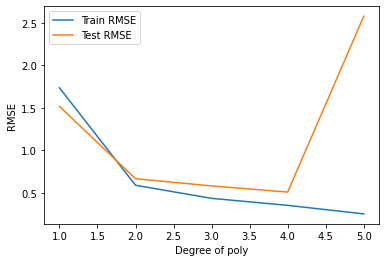

In [25]:
plt.plot(range(1, 6), train_rmse_errors[:5], label = "Train RMSE")
plt.plot(range(1, 6), test_rmse_errors[:5], label='Test RMSE')
plt.ylabel('RMSE')
plt.xlabel('Degree of poly')
plt.legend()

#degree=3 is the safe and best fir over overfitted and underfitted

In [26]:
final_poly_converter = PolynomialFeatures(degree=3, include_bias=False)
final_model = LinearRegression()
full_converted_X = final_poly_converter.fit_transform(X)
final_model.fit(full_converted_X, y)

LinearRegression()

In [33]:
from joblib import dump, load
dump(final_model, 'final_poly_model.joblib')
dump(final_poly_converter, 'final_converter.joblib')

['final_converter.joblib']

In [34]:
loaded_converter = load('final_converter.joblib')
loaded_model = load('final_poly_model.joblib')

In [38]:
campaingn = [[149,22,12]]
transformed_data = loaded_converter.fit_transform(campaingn)

In [39]:
loaded_model.predict(transformed_data)

array([14.64501014])